# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Reading in my count vectorized data, and my cleaned dataframe 

In [3]:
df = pd.read_csv('./X.csv',index_col=0)
#target = pd.read_csv('./clean_data_years.csv', index_col=0)
df2 = pd.read_csv('./final_clean_df.csv',index_col=0)

Sensoring vulgar words

In [4]:
df2['lyrics']=df2['lyrics'].str.replace('nigga','n___')

In [5]:
df2['lyrics']=df2['lyrics'].str.replace('fuck','f___')

In [6]:
df2['lyrics']=df2['lyrics'].str.replace('bitch','b___')

In [7]:
df2['lyrics']=df2['lyrics'].str.replace('shit','s___')

Adding the target variable to my tokenized dataframe

In [287]:
df['target'] = df2['hot100']

In [289]:
years = df['date_year'].unique()
years.sort()

Creating a data frame of summed counts for each word

In [341]:
df_sum = df.sum()

In [445]:
df_sum[df_sum.map(type) == str].drop('artist', inplace=True)

In [349]:
df_sum.drop('artist', inplace=True)

Examining my most important words. The top 5 are all swear words

In [360]:
df_sum.sort_values(ascending=False)[1:10]

nigga    87816
fuck     37090
bitch    36169
shit     35849
yeah     29425
cause    28019
man      23223
make     22918
say      20981
dtype: object

## Plotting the top four most common words in my rap corpus

...And they happen to be all curse words

Text(0.5, 1.0, 'Word vs. Number of Times Mentioned')

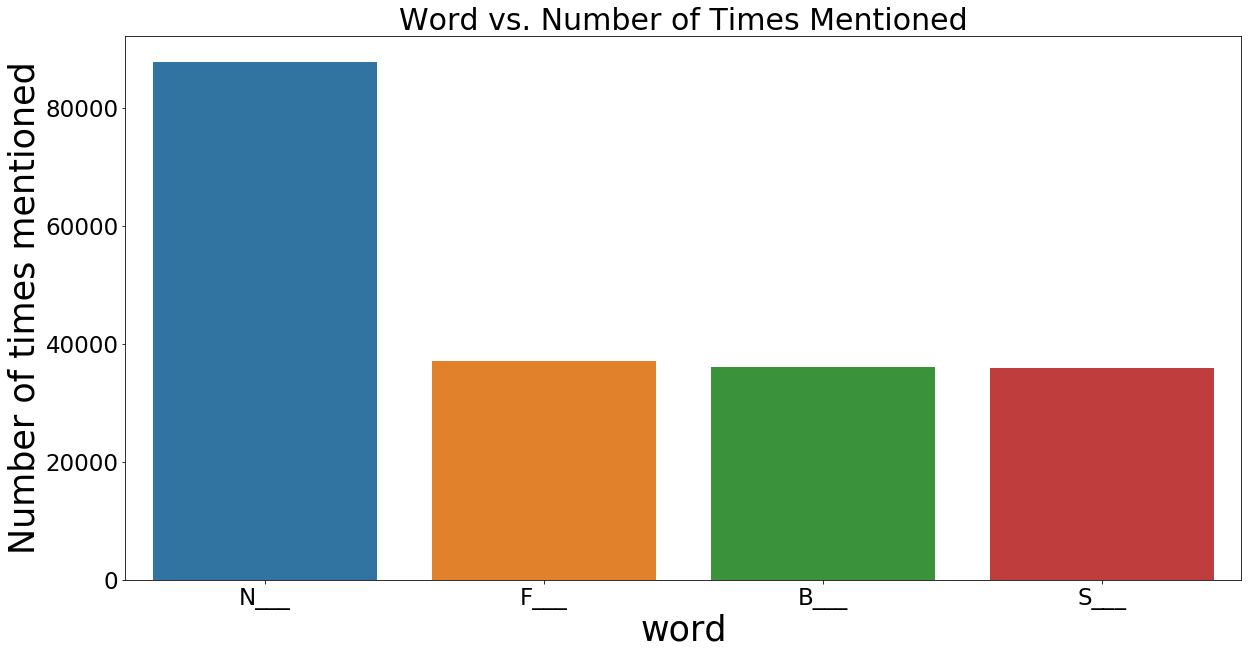

In [365]:
plt.figure(figsize=(20,10))
sns.barplot(x = ['N___','F___','B___','S___'],y=[df_sum['nigga'],df_sum['fuck'],df_sum['bitch'],df_sum['shit']])
plt.xlabel('word', size=35)
plt.xticks(size=23)
plt.ylabel('Number of times mentioned', size=35)
plt.yticks(size=23)
plt.title("Word vs. Number of Times Mentioned", fontsize=30)

## Plotting the number of hits per year

In [366]:
hits_year = [(sum(df[df['date_year'] == year]['target'])) for year in years]

In [16]:
hits_year = [(sum(df[df['date_year'] == year]['target']))/len(df[df['date_year'] == year]) for year in years]

Text(0.5, 1.0, 'Year vs. Number of Hits')

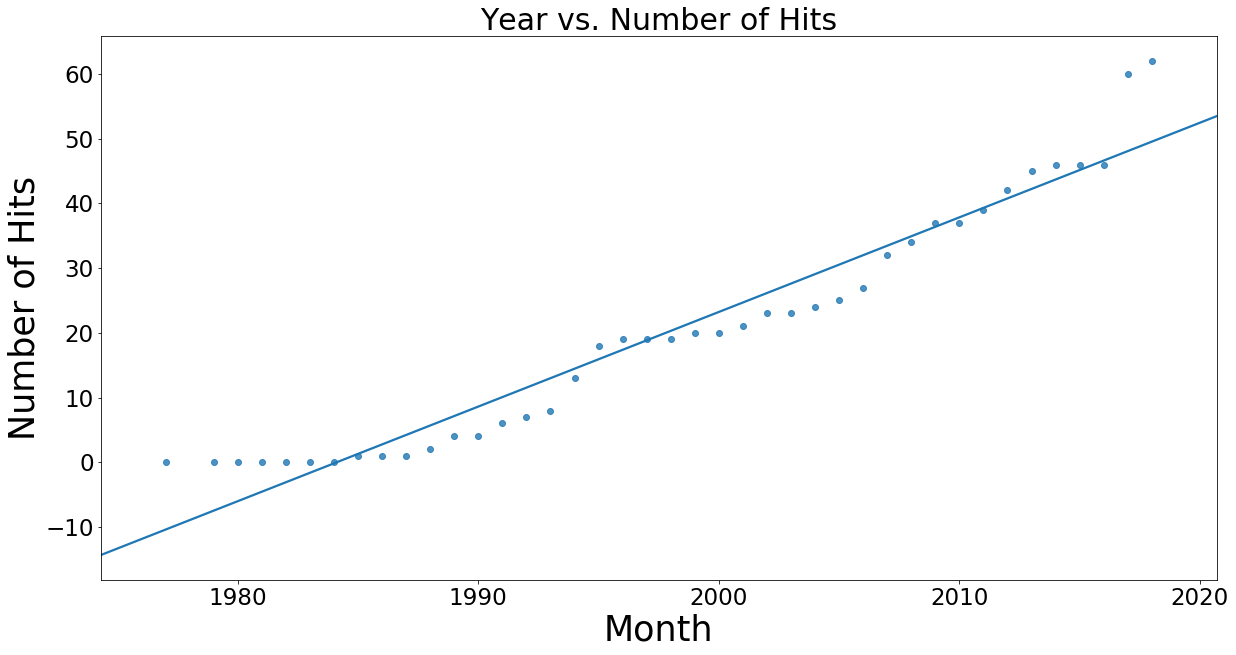

In [376]:
plt.figure(figsize=(20,10))
sns.regplot(x=years, y=hits_year, ci=None)
plt.xlabel('Month', size=35)
plt.xticks(size=23)
plt.ylabel('Number of Hits', size=35)
plt.yticks(size=23)
plt.title("Year vs. Number of Hits", fontsize=30)

## Plotting years. vs ratio of songs with the word 'f___'

By looking at my components it seemed that curse words had a lot of negative weights 

In [26]:
f_=[len(df[(df['date_year'] == year) & (df['fuck']>1)&(df['target']!=1)])/len(df[(df['date_year']==year)&(df['target']!=1)]) for year in years]

Since hits are sparse, I'll have to use this function to create a list of years where there were hits

In [30]:
years_hits = []
for year in years:
    if len(df[(df['date_year'] == year)&(df['target']==1)]) != 0:
        years_hits.append(year)
    else:
        pass      

In [33]:
f1_=[len(df[(df['date_year'] == year) & (df['fuck']>1)&(df['target']==1)])/len(df[(df['date_year']==year)&(df['target']==1)]) for year in years_hits]

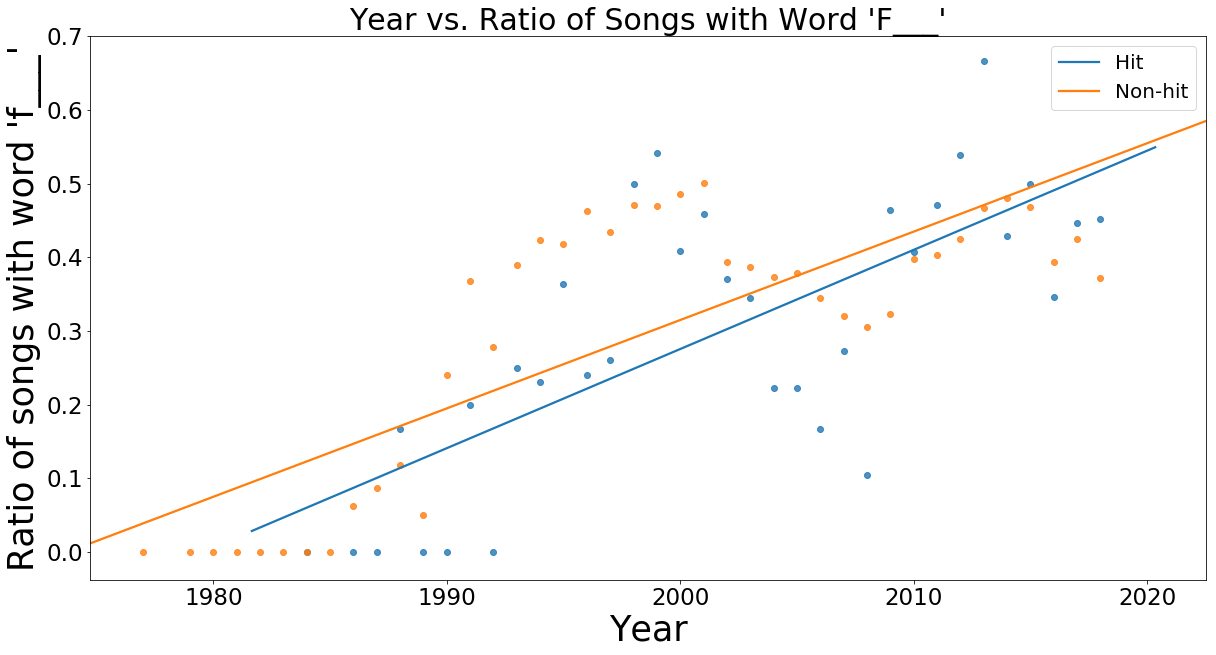

In [498]:
plt.figure(figsize=(20,10))

sns.regplot(x=years_hits, y=f1_, ci=None)
sns.regplot(x=years, y=f_, ci=None)


plt.xlabel('Year', size=35)
plt.xticks(size=23)
plt.ylabel("Ratio of songs with word 'f___'", size=35)
plt.yticks(size=23)
plt.title("Year vs. Ratio of Songs with Word 'F___'", fontsize=30)
plt.legend(['Hit', 'Non-hit'],prop = {'size':20})

## Plotting the word money

Money was arguably the most important word when it comes to predicting success on the billboard charts, so let's examine its usage over time 

In [31]:
m1_=[len(df[(df['date_year'] == year)&(df['money']>1)&(df['target']==1)])/len(df[(df['date_year']==year)&(df['target']==1)]) for year in years_hits]

In [24]:
m_=[len(df[(df['date_year'] == year)&(df['money']>1)&(df['target']!=1)])/len(df[(df['date_year']==year)&(df['target']!=1)]) for year in years]

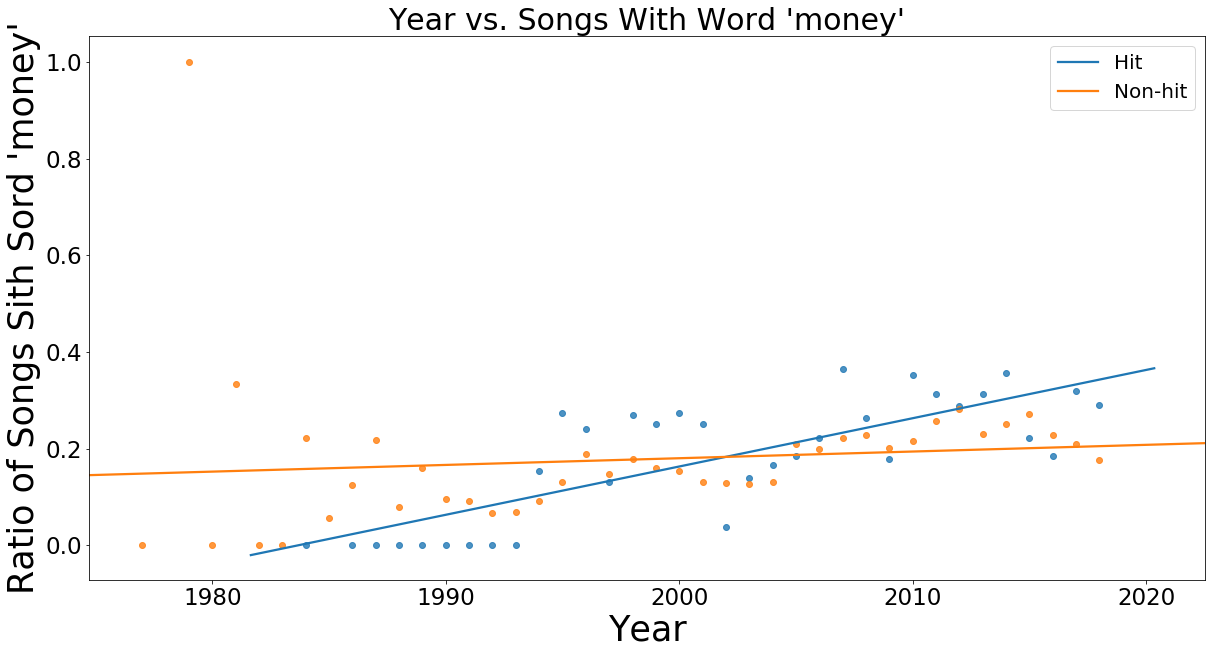

In [456]:
plt.figure(figsize=(20,10))

sns.regplot(x=years_hits, y=m1_, ci=None)

sns.regplot(x=years, y=m_, ci=None)

plt.xlabel('Year', size=35)
plt.xticks(size=23)
plt.ylabel("Ratio of Songs Sith Sord 'money'", size=35)
plt.yticks(size=23)
plt.title("Year vs. Songs With Word 'money'", fontsize=30)
plt.legend(['Hit', 'Non-hit'],prop = {'size':20})

### Plotting the use of the word 'girl' over time

the word girl had a strong, negative weight with predicting a hit, it also seems to be decreasing over time 

In [216]:
girl_ = [len(df[(df['date_year'] == year) & (df['girl']>1)&(df['target']!=1)])/len(df[(df['date_year']==year)&(df['target']!=1)]) for year in years]

In [217]:
girl1_ = [len(df[(df['date_year'] == year) & (df['girl']>1)&(df['target']==1)])/len(df[(df['date_year']==year)&(df['target']==1)]) for year in years_hits]

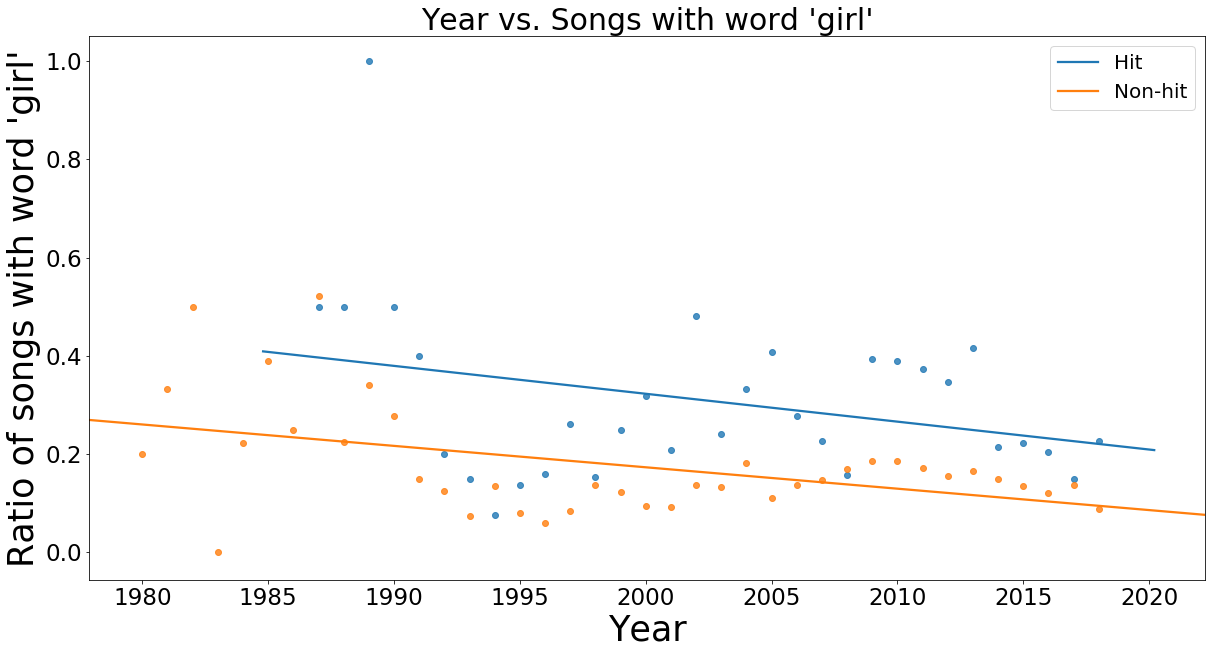

In [465]:
plt.figure(figsize=(20,10))


sns.regplot(x=years_hits[2:], y=girl1_[2:], ci=None)
sns.regplot(x=years[2:], y=girl_[2:], ci=None)

plt.xlabel('Year', size=35)

plt.xticks(size=23)
plt.ylabel("Ratio of songs with word 'girl'", size=35)
plt.yticks(size=23)
plt.title("Year vs. Songs with word 'girl'", fontsize=30)
plt.legend(['Hit', 'Non-hit'],prop = {'size':20})

### Plotting the word 'lie' over time

Lie also had a positive weight when it came to predicting a hit. In the graph you can see that hits have a higher ratio of songs with the word 'lie' but at 2018 it converges with the ratio for non-hits

In [391]:
lie_ = [len(df[(df['date_year'] == year) & (df['lie']>1)&(df['target']!=1)])/len(df[(df['date_year']==year)&(df['target']!=1)]) for year in years]

In [395]:
lie1_ = [len(df[(df['date_year'] == year) & (df['lie']>1)&(df['target']==1)])/len(df[(df['date_year']==year)&(df['target']==1)]) for year in years_hits[1:]]

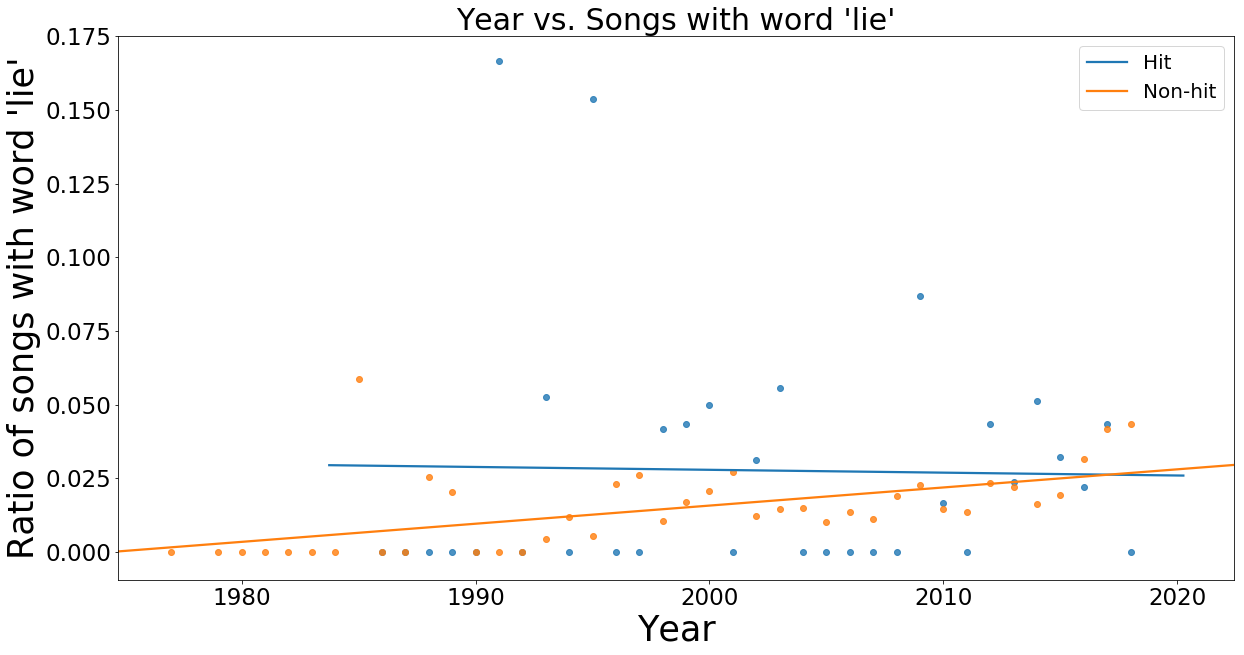

In [458]:
plt.figure(figsize=(20,10))

sns.regplot(x=years_hits[1:], y=lie1_, ci=None)
sns.regplot(x=years, y=lie_, ci=None)

plt.xlabel('Year', size=35)
plt.xticks(size=23)
plt.ylabel("Ratio of songs with word 'lie'", size=35)
plt.yticks(size=23)
plt.title("Year vs. Songs with word 'lie'", fontsize=30)
plt.legend(['Hit', 'Non-hit'],prop = {'size':20})

In [398]:
say_ = [len(df[(df['date_year'] == year) & (df['say']>1)&(df['target']!=1)])/len(df[(df['date_year']==year)&(df['target']!=1)]) for year in years]

In [402]:
say1_ = [len(df[(df['date_year'] == year) & (df['say']>1)&(df['target']==1)])/len(df[(df['date_year']==year)&(df['target']==1)]) for year in years_hits[1:]]

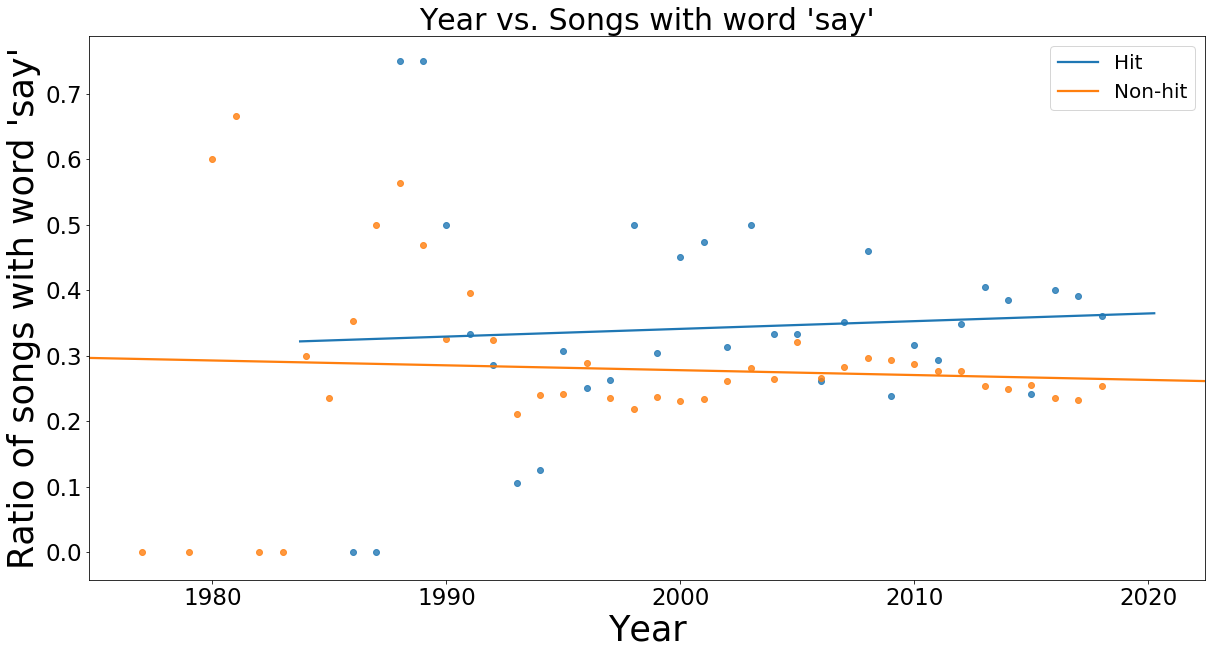

In [468]:
plt.figure(figsize=(20,10))

sns.regplot(x=years_hits[1:], y=say1_, ci=None)
sns.regplot(x=years, y=say_, ci=None)

plt.xlabel('Year', size=35)
plt.xticks(size=23)
plt.ylabel("Ratio of songs with word 'say'", size=35)
plt.yticks(size=23)
plt.title("Year vs. Songs with word 'say'", fontsize=30)
plt.legend(['Hit', 'Non-hit'],prop = {'size':20})

# Word Clouds

Let's take a look at the most common words found in hits

In [215]:
 from wordcloud import WordCloud

In [43]:
WordCloud

wordcloud.wordcloud.WordCloud

In [44]:
df2.dropna(inplace=True)

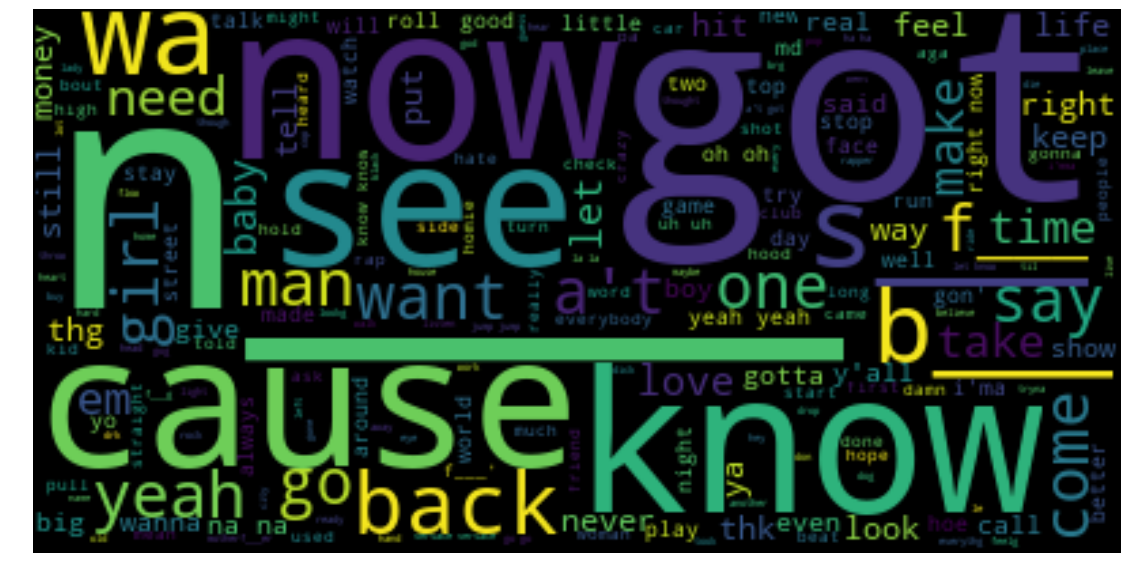

In [45]:
# Start with one review:
plt.figure(figsize=(20,10))
text = " ".join(song for song in df2[df2['hot100']==1].lyrics)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As well as the most popular words in non-hits

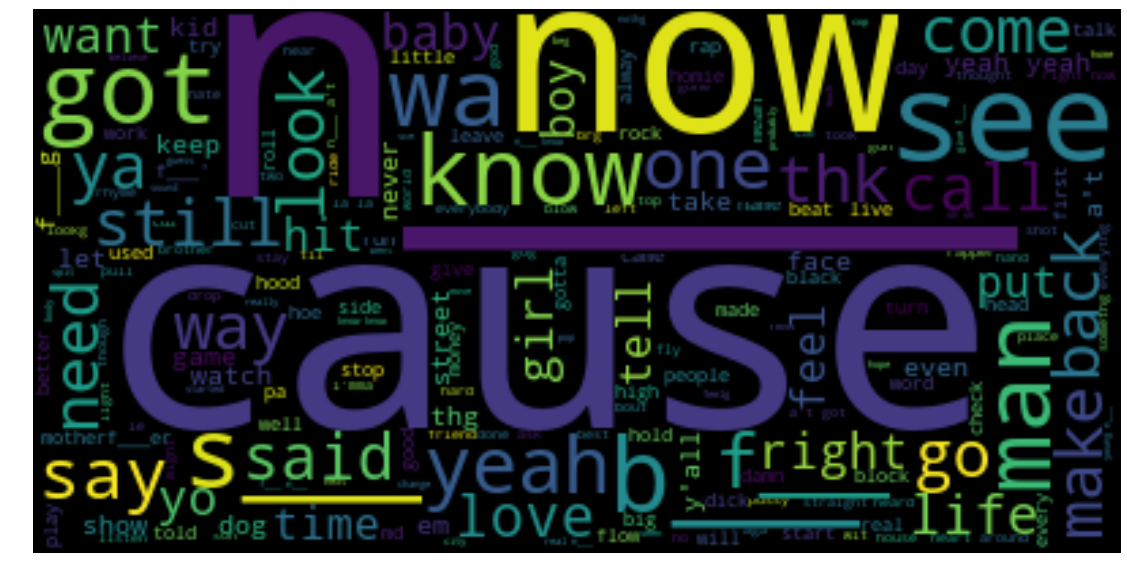

In [46]:
# Start with one review:
plt.figure(figsize=(20,10))
text = " ".join(song for song in df2[df2['hot100']==0].lyrics)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As we can see a lot of words are shared. Let's run t-tests on the top overlapping words to see if there is a significant difference between their mean frequencies

In [47]:
top_words_non_hits = list(df.groupby('target').
     mean().T.sort_values(0, ascending=False).head(20).index)

top_words_jots = list(df.groupby('target').
     mean().T.sort_values(1, ascending=False).head(20).index)

In [48]:
top_words_overlap = [song for song in top_words_non_hits if song in top_words_jots]

And the hypotheses are

$H_0$: The corpus for hits and non-hits have the same mean frequency for word $x$.

$H_A$: The corpus for hits and non-hits have a different mean frequency for word $x$.

We'll set our alpha at .05

In [49]:
from scipy.stats import ttest_ind

In [50]:
ttest_dict = {}
for word in top_words_overlap:
    ttest_dict[word] = ttest_ind(df[df['target']==1][word], 
         df[df['target']==0][word])

In [51]:
ttest_dict

{'date_year': Ttest_indResult(statistic=-6.423661970082948, pvalue=1.3651897462283125e-10),
 'nigga': Ttest_indResult(statistic=-3.9395967300025707, pvalue=8.194046416484716e-05),
 'fuck': Ttest_indResult(statistic=-2.480968729778902, pvalue=0.013112058050149792),
 'bitch': Ttest_indResult(statistic=-1.5520977815246417, pvalue=0.12065719958983429),
 'shit': Ttest_indResult(statistic=-0.8485205444214158, pvalue=0.3961599264848912),
 'yeah': Ttest_indResult(statistic=5.412888652329886, pvalue=6.284530656868614e-08),
 'cause': Ttest_indResult(statistic=6.451423266229414, pvalue=1.1375677359295666e-10),
 'man': Ttest_indResult(statistic=0.7420678014846682, pvalue=0.45805637464618587),
 'make': Ttest_indResult(statistic=5.352506447773459, pvalue=8.785450170111546e-08),
 'say': Ttest_indResult(statistic=5.883741192000417, pvalue=4.0852764938067775e-09),
 'time': Ttest_indResult(statistic=2.0829544923397183, pvalue=0.03727008450964983),
 'money': Ttest_indResult(statistic=0.8132049729566632, 

Only the words 'n__', 'come', and 'time' had p-values less than our alpha. Also the average year for both hits and non-hits was significantly different which is interesting 

# Plotting Brand Names

A common theme in rap music is fashion, so I decided to plot 4 designer brands to see which ones reign supreme in rap music

In [52]:
versace = [len(df[(df['date_year'] == year) & (df['versace']>1)])/len(df[df['date_year']==year]) for year in years]
gucci = [len(df[(df['date_year'] == year) & (df['gucci']>1)])/len(df[df['date_year']==year]) for year in years]
prada = [len(df[(df['date_year'] == year) & (df['prada']>1)])/len(df[df['date_year']==year]) for year in years]
louis_vuitton = [len(df[(df['date_year'] == year) & (df['vuitton']>1)])/len(df[df['date_year']==year]) for year in years]

(array([-0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07]),
 <a list of 9 Text yticklabel objects>)

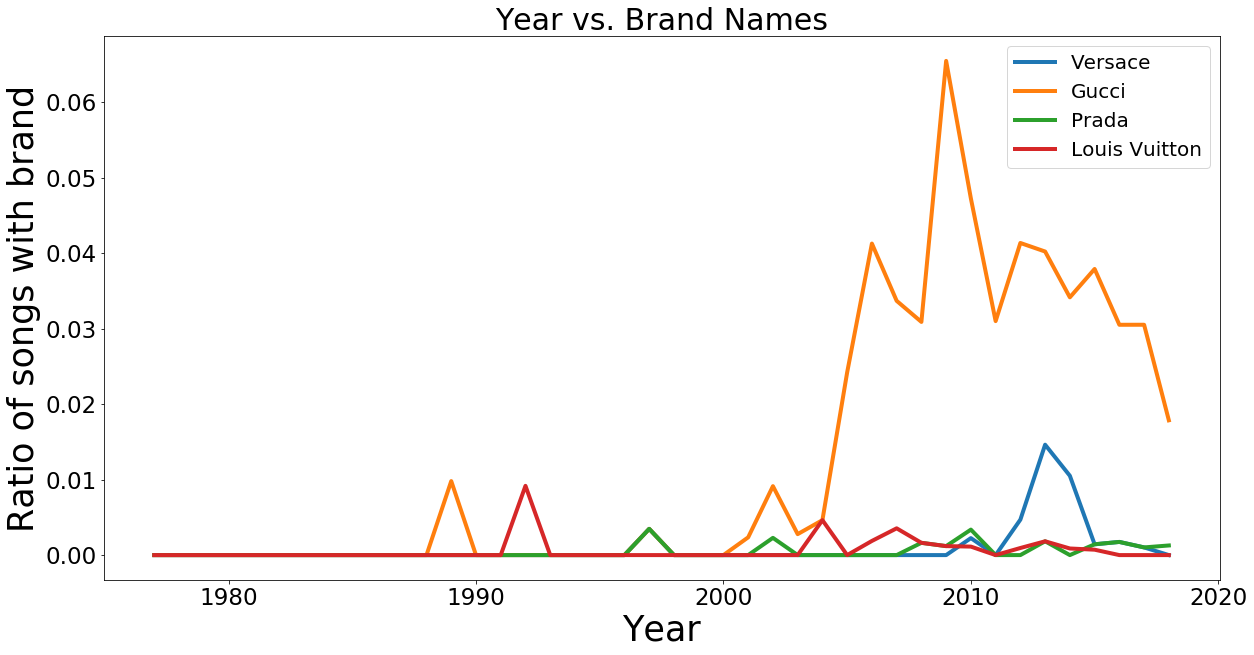

In [472]:
plt.figure(figsize=(20,10))

sns.lineplot(x=years, y=versace, palette = 'rainbow_r', ci=None, lw=4)
sns.lineplot(x=years, y=gucci, palette = 'rainbow_r', ci=None, lw=4)
sns.lineplot(x=years, y=prada, palette = 'rainbow_r', ci=None, lw=4)
sns.lineplot(x=years, y=louis_vuitton, palette = 'rainbow_r', ci=None, lw=4)
plt.legend(['Versace', 'Gucci','Prada','Louis Vuitton'],prop = {'size':20})
plt.xlabel('Year', size=35)
plt.xticks(size=23)
plt.ylabel("Ratio of songs with brand", size=35)
plt.title("Year vs. Brand Names", fontsize=30)
plt.yticks(size=23)

Gucci is by far the most popular, Versace also has an interesting bump in the around 2013

# Let's look at which artists have the most hits

In [474]:
dic={}
for artist in df2['artist'].unique():
    if '$$' in artist:
        artist = artist.replace('$$', 'SSSSS')
    dic[artist] = sum(df2[df2['artist'] == artist]['hot100'])


In [475]:
hits = dic.values()

In [476]:
x = sorted(dic, key = dic.__getitem__,  reverse=True)

In [477]:
y = sorted(dic.values(), reverse=True)

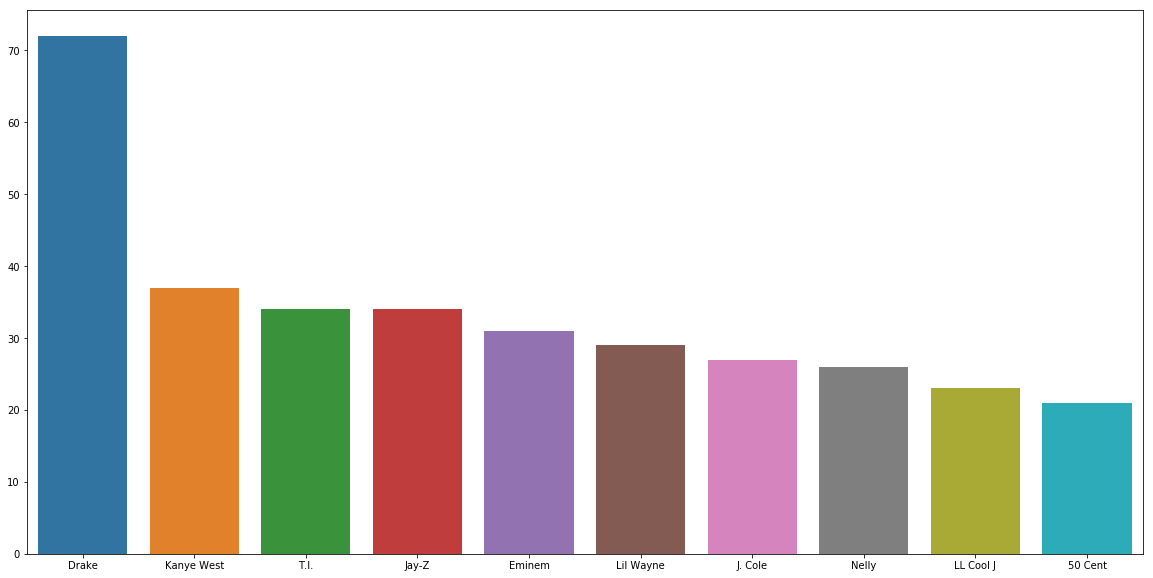

In [478]:
plt.figure(figsize=(20,10))

sns.barplot(x = x[0:10],y= y[0:10])

Drake, Kaney, and T.I. have the most hits

# Plotting the distribution for length of song

I'm now going to look at some distributions of the song data. Let's start by looking at the lengths of songs

Writing some functions to help me get the length of the song

In [60]:
def length_of_song(df):
    lengths = []
    dates = []
    for i in range(len(df)):
        lengths.append(len(df.loc[i,'lyrics']))
        dates.append(df.loc[i,'year'])
    return lengths, dates

In [61]:
def clean_df(df):
    for i in range(len(df)):
        if (type(df.loc[i,'lyrics']) == np.float):
            df.drop(index=i, inplace=True)
    return df

Creating a 'clean' data frame (making sure there are no floats for lyrics)

In [62]:
df2.reset_index(inplace=True)

In [63]:
df3 = clean_df(df2)

In [65]:
df3.reset_index(inplace=True)

In [66]:
df3.drop('index',axis=1,inplace=True)

Grab the length of our songs, as well as the date of the song (for future plots)

In [67]:
y_length, dates = length_of_song(df3)

In [69]:
length_v_years = pd.DataFrame(data = [y_length,dates]).T

In [71]:
def year_averages(length_v_years):  
    averages = []
    for year in length_v_years[1].unique():
        averages.append(np.median(length_v_years[length_v_years[1] == year][0]))
    return averages
    

In [480]:
mask = length_v_years[0] > 100

In [482]:
np.mean(length_v_years[mask][0])

2523.566619833743

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Length of Song')

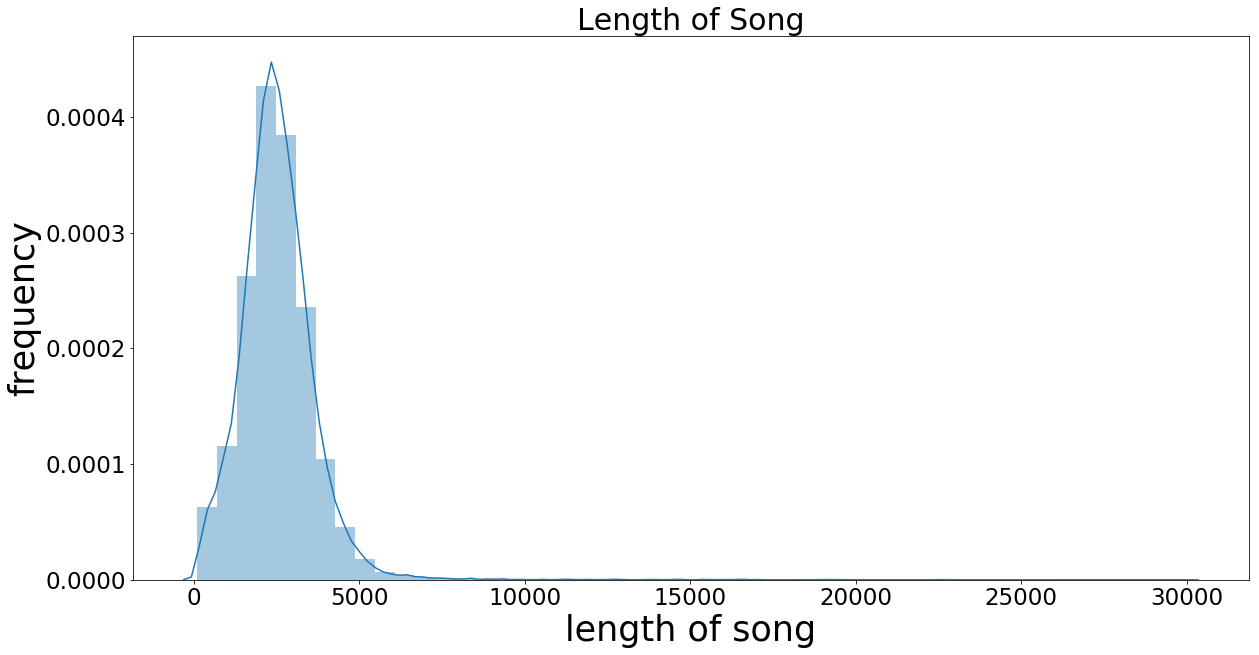

In [481]:
plt.figure(figsize=(20,10))

sns.distplot(length_v_years[mask][0])

plt.xlabel('length of song', size=35)
plt.xticks(size=23)
plt.ylabel("frequency", size=35)
plt.yticks(size=23)
plt.title("Length of Song", fontsize=30)

The mean length (measured in number of words) of a song is 2523 words

Let's look at the length of songs over time by using the average length of a song for each year

# Plotting time vs. the average length of a song per year

In [417]:
average_length = length_v_years[length_v_years[0]>1500]

Text(0.5, 1.0, 'Time vs. Average Length of Song')

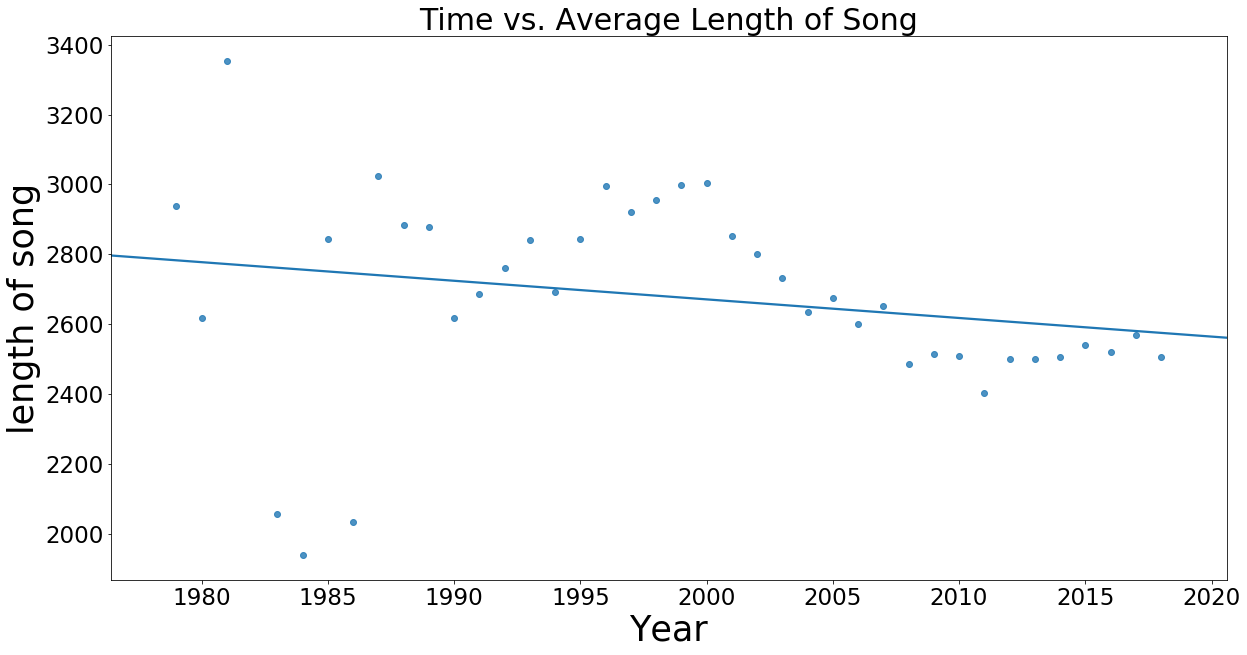

In [483]:
plt.figure(figsize=(20,10))

sns.regplot(x=average_length[1].unique(), y=year_averages(average_length), ci=None)

plt.xlabel('Year', size=35)
plt.xticks(size=23)
plt.ylabel("length of song", size=35)
plt.yticks(size=23)
plt.title("Time vs. Average Length of Song", fontsize=30)

# Plotting unique words

This will require a fair amount of pre-processing

Adding the artist column to mny tokenized dataframe

In [154]:
df['artist'] = df2['artist']

Writing a helper function and a function to create my unique words per artist dataframe

In [155]:
def artist_words(df, artist):
    masked = df[df.artist == artist].copy()
    masked.drop(['artist', 'date_year'], 1, inplace = True)
    masked_sum = masked.sum()
    return masked_sum[masked_sum > 0].index.shape[0]    

In [156]:
def collapse(df):
    unique_count = []
    for artist in df['artist'].unique():
        unique_count.append(artist_words(df, artist))
    return unique_count

In [157]:
%time x = collapse(df)

CPU times: user 8.38 s, sys: 2.76 s, total: 11.1 s
Wall time: 11.2 s


Creating my dataframe and adding columns for number of songs and unique words per song

In [158]:
unique_words = pd.DataFrame(x,df['artist'].unique())

In [159]:
unique_words.reset_index(inplace=True)

In [162]:
for i in range(len(unique_words)):
    unique_words.loc[i,'num_songs'] = len(df[df['artist']==unique_words.loc[i,'index']])

In [166]:
for i in range(len(unique_words)):
    if unique_words.loc[i,0] > 15:
        unique_words.loc[i,'unique_per_song'] = unique_words.loc[i,0]/unique_words.loc[i,'num_songs']

Weeding out outliers 

In [430]:
mask = (unique_words['num_songs'] > 15)

In [173]:
unique_words.dropna(inplace=True)

Adding one more column for year and checking my newly created dataframe

In [186]:
unique_words['year'] = df['date_year']

In [194]:
unique_words.head()

,index,0,num_songs,unique_per_song,year
0,MF Doom,4199,62.0,67.725806,1999.0
1,XXXTentacion,2976,168.0,17.714286,2009.0
2,A$AP Rocky,4128,99.0,41.696970,2002.0
3,Chance the Rapper,3515,79.0,44.493671,2009.0
4,2 Chainz,4941,155.0,31.877419,1999.0


# Plotting each artist's unique words per song over time

Now I am going to examine each artist's vocabulary and see if it's imporoving or worsening over time

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, "Time vs. Artist's Unique Words per Song")

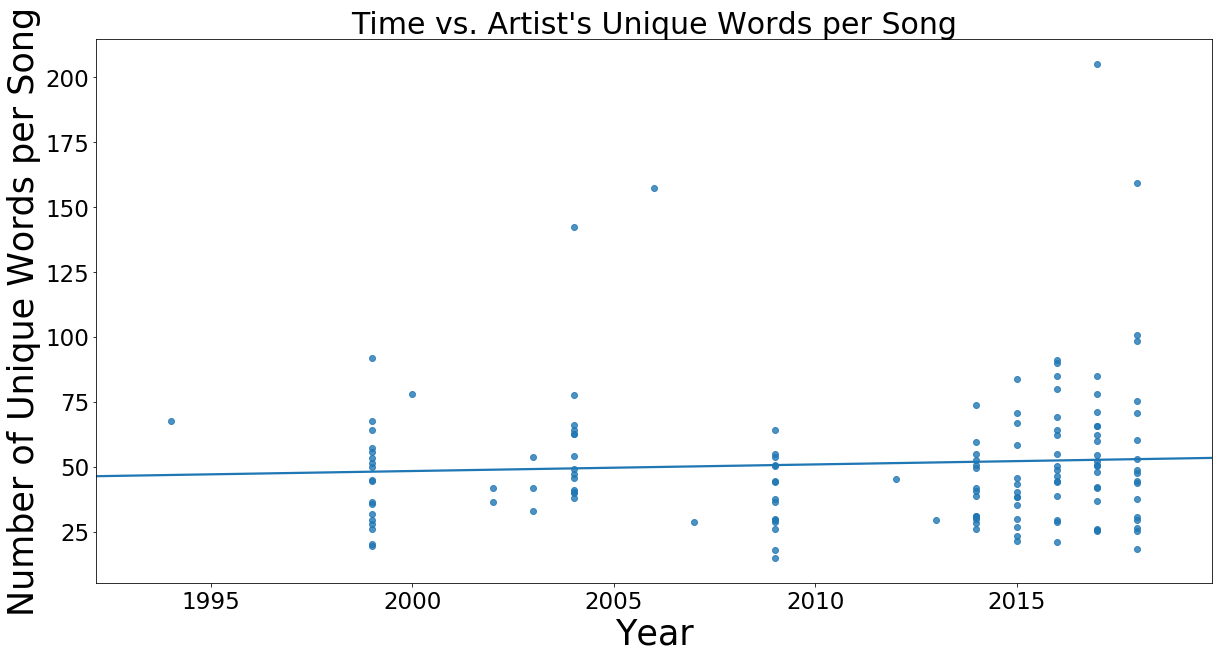

In [486]:
plt.figure(figsize=(20,10))

sns.regplot(x=unique_words[mask]['year'], y=unique_words[mask]['unique_per_song'], ci=None)

plt.xlabel('Year', size=35)
plt.xticks(size=23)
plt.ylabel("Number of Unique Words per Song", size=35)
plt.yticks(size=23)
plt.title("Time vs. Artist's Unique Words per Song", fontsize=30)

It seems there is a slight increase over time

# Plotting artist's with the best vocabulary

In [439]:
mask = (unique_words['num_songs'] > 50) & (unique_words['num_songs'] < 300)

Text(0.5, 1.0, 'Unique Words per Song')

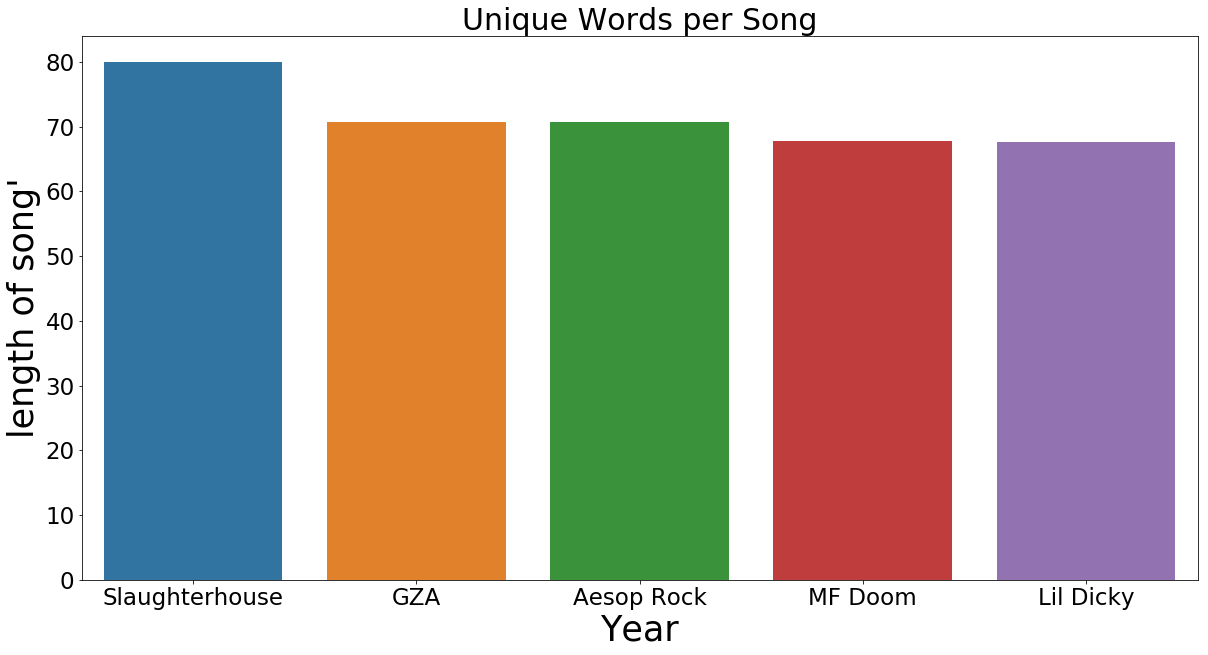

In [443]:
plt.figure(figsize=(20,10))

sns.barplot(x = unique_words[mask].sort_values('unique_per_song',ascending=False)[0:5]['index'],
            y = unique_words[mask].sort_values('unique_per_song',ascending=False)[0:5]['unique_per_song'])


plt.xlabel('Year', size=35)
plt.xticks(size=23)
plt.ylabel("length of song'", size=35)
plt.yticks(size=23)
plt.title("Unique Words per Song", fontsize=30)

This plot agrees with a similar plot that went viral on reddit

# ... And the worst vocabulary

Text(0.5, 1.0, 'Unique Words per Song')

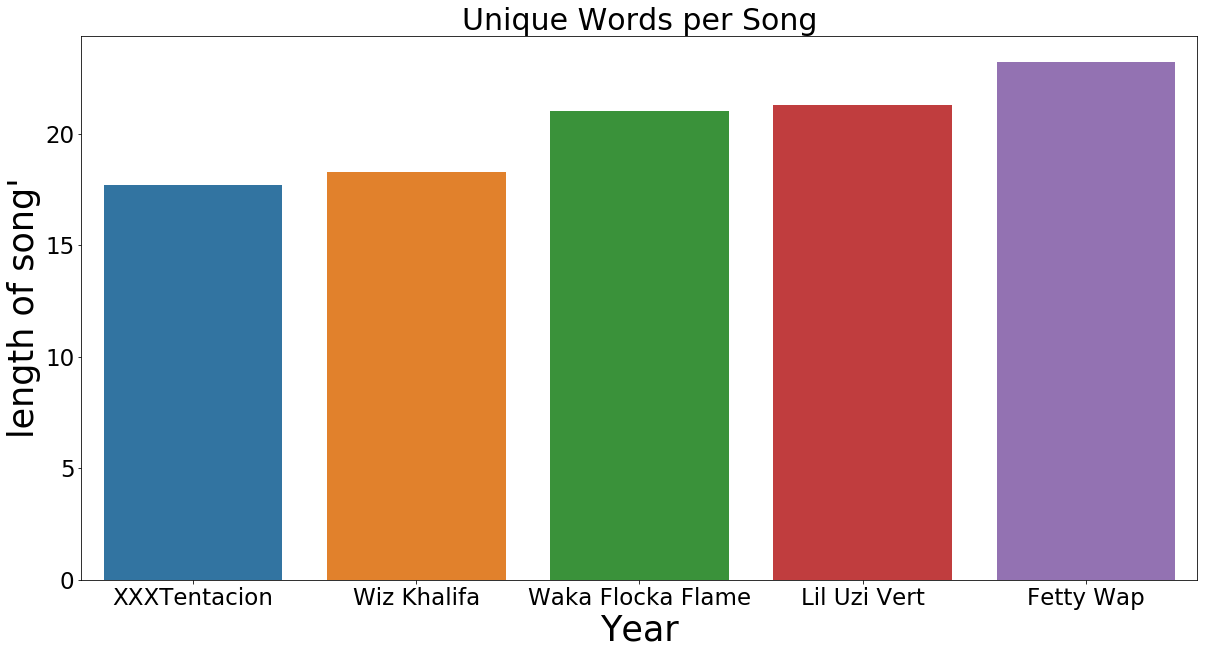

In [444]:
plt.figure(figsize=(20,10))

sns.barplot(x = unique_words[mask].sort_values('unique_per_song',ascending=True)[0:5]['index'],
            y = unique_words[mask].sort_values('unique_per_song',ascending=True)[0:5]['unique_per_song'])


plt.xlabel('Year', size=35)
plt.xticks(size=23)
plt.ylabel("length of song'", size=35)
plt.yticks(size=23)
plt.title("Unique Words per Song", fontsize=30)

# The Distribution of Unique Words Per Song

In [244]:
df_bool = df > 0

In [248]:
df_bool_sum = df_bool.T.sum()

In [491]:
np.mean(df_bool_sum)

146.95243902439023

Text(0.5, 1.0, 'Distribution of Unique Words per Song')

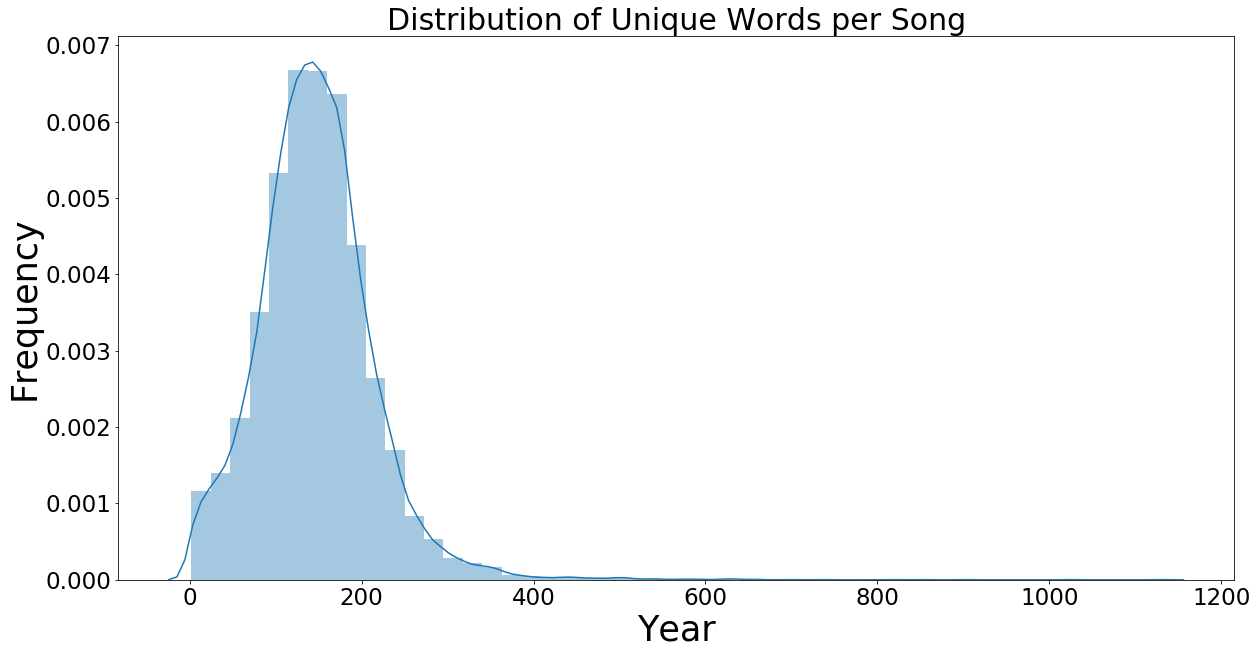

In [490]:
plt.figure(figsize=(20,10))

sns.distplot(df_bool_sum)

plt.xlabel('Year', size=35)
plt.xticks(size=23)
plt.ylabel("Frequency", size=35)
plt.yticks(size=23)
plt.title("Distribution of Unique Words per Song", fontsize=30)

The average rate of unique words per song is about 147 unique words per song

# Plotting time vs. unique words per song

Text(0.5, 1.0, 'Time vs. unique words per song')

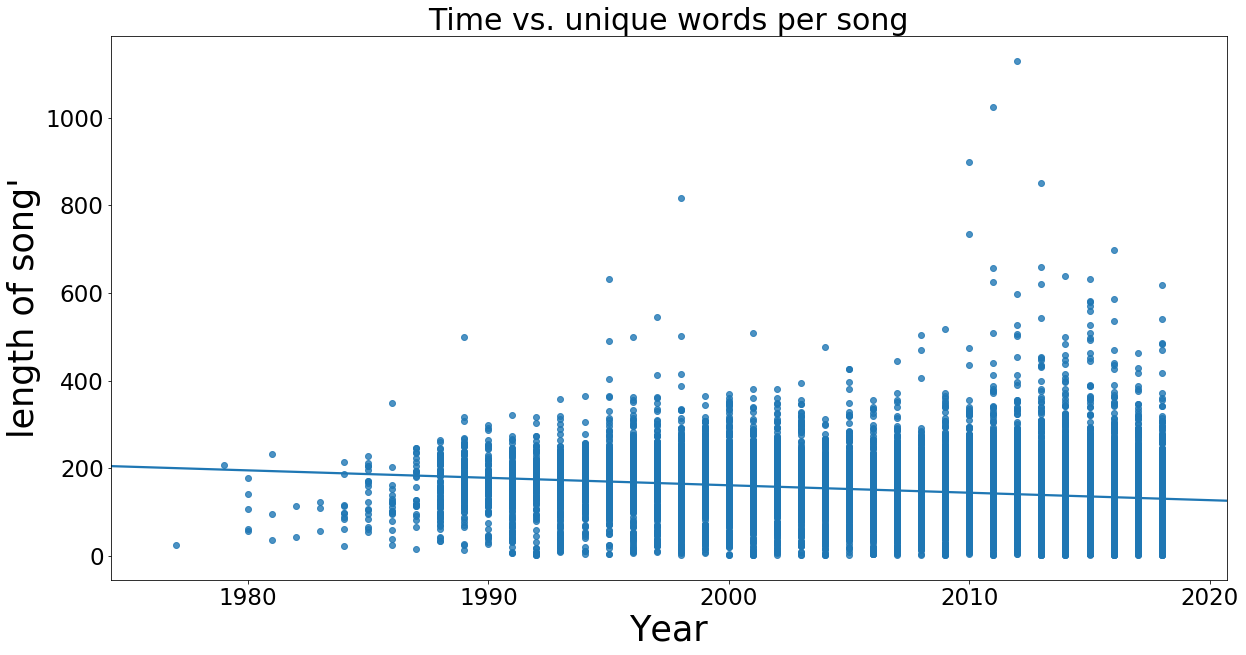

In [257]:
plt.figure(figsize=(20,10))

sns.regplot(x=df['date_year'], y=df_bool_sum, ci=None)

plt.xlabel('Year', size=35)
plt.xticks(size=23)
plt.ylabel("length of song'", size=35)
plt.yticks(size=23)
plt.title("Time vs. unique words per song", fontsize=30)